<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [11]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [13]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [14]:
data=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [15]:
data.head()


,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


### TASK2

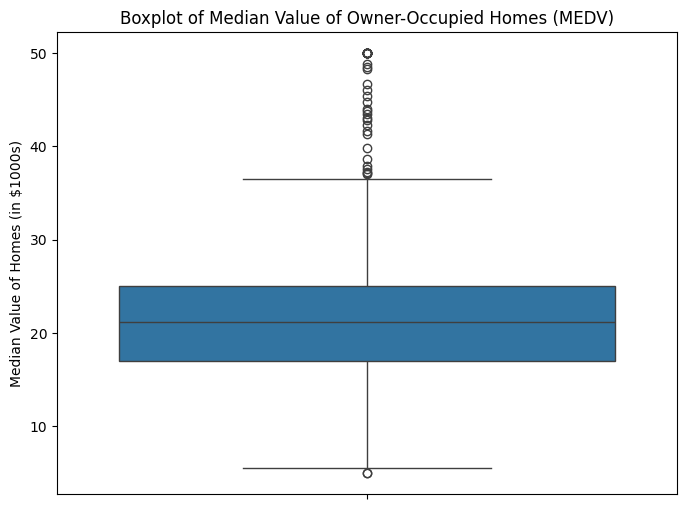

In [16]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=data['MEDV'])
plt.title('Boxplot of Median Value of Owner-Occupied Homes (MEDV)')
plt.ylabel('Median Value of Homes (in $1000s)')
plt.show()

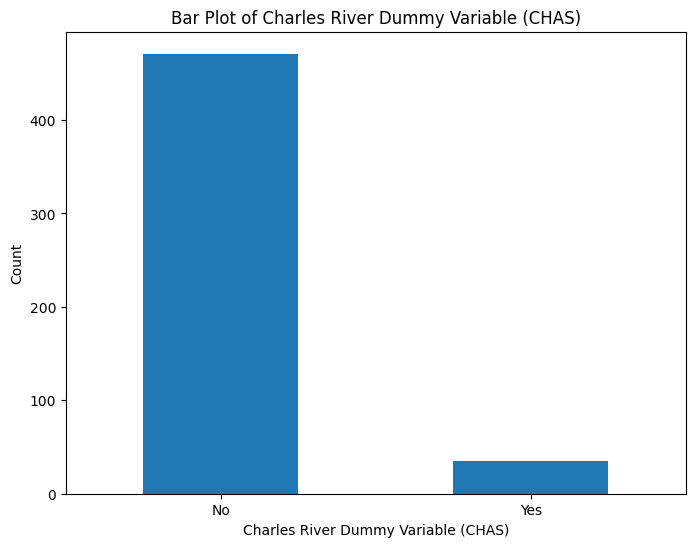

In [17]:
# Bar plot for CHAS
plt.figure(figsize=(8, 6))
data['CHAS'].value_counts().plot(kind='bar')
plt.title('Bar Plot of Charles River Dummy Variable (CHAS)')
plt.xlabel('Charles River Dummy Variable (CHAS)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0)
plt.show()


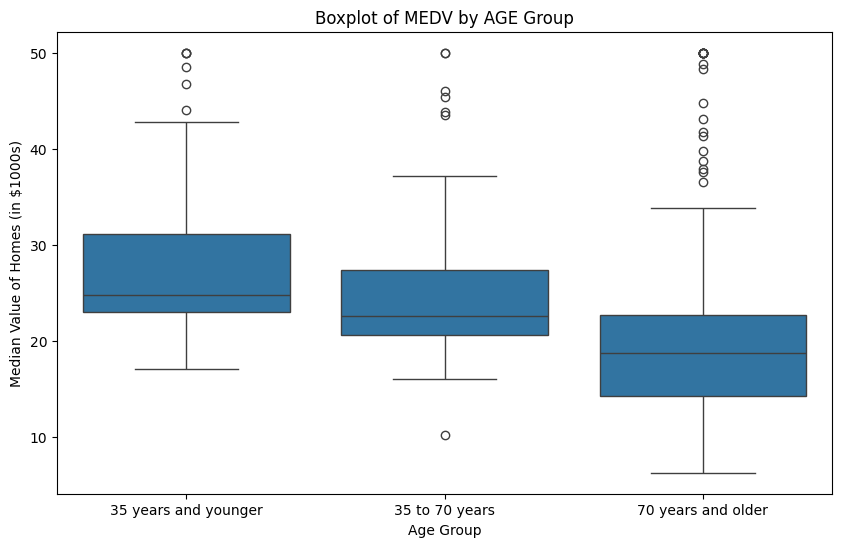

In [18]:
# Discretize AGE into three groups
bins = [0, 35, 70, data['AGE'].max()]
labels = ['35 years and younger', '35 to 70 years', '70 years and older']
data['AGE_GROUP'] = pd.cut(data['AGE'], bins=bins, labels=labels, right=False)

# Boxplot for MEDV vs AGE_GROUP
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['AGE_GROUP'], y=data['MEDV'])
plt.title('Boxplot of MEDV by AGE Group')
plt.xlabel('Age Group')
plt.ylabel('Median Value of Homes (in $1000s)')
plt.show()


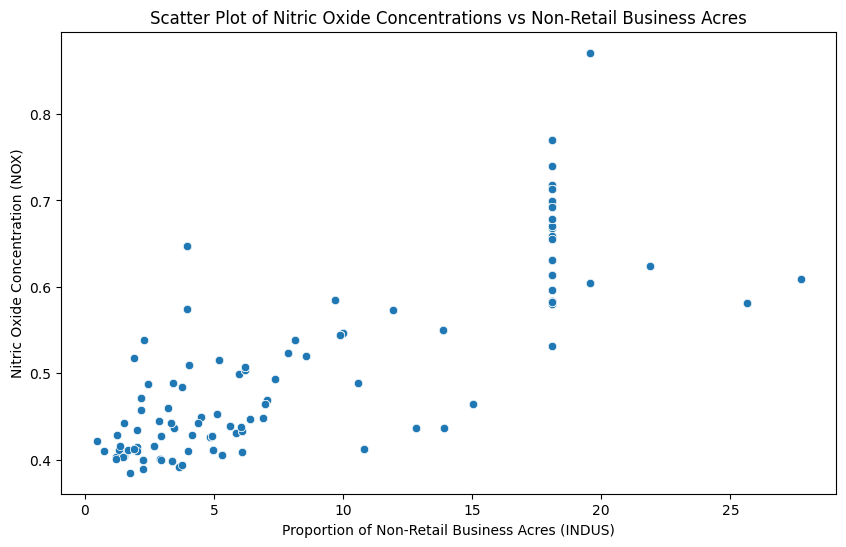

In [19]:
# Scatter plot for NOX vs INDUS
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['INDUS'], y=data['NOX'])
plt.title('Scatter Plot of Nitric Oxide Concentrations vs Non-Retail Business Acres')
plt.xlabel('Proportion of Non-Retail Business Acres (INDUS)')
plt.ylabel('Nitric Oxide Concentration (NOX)')
plt.show()


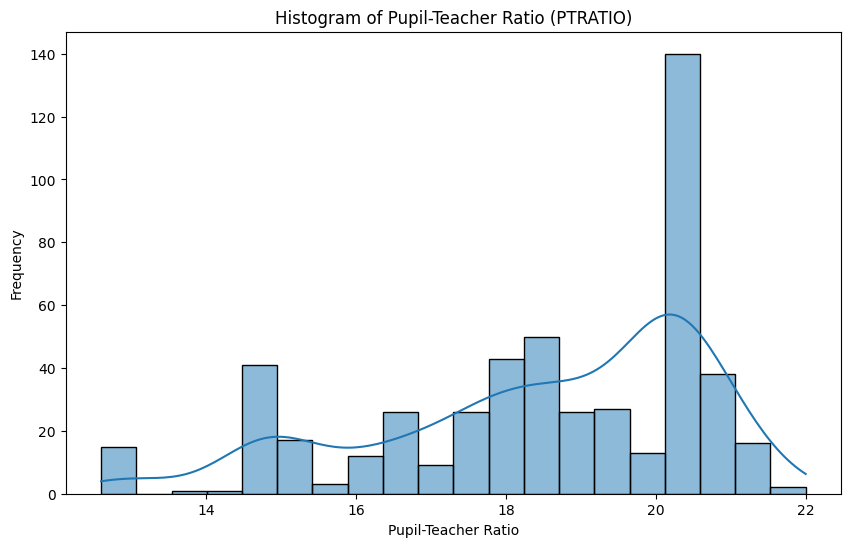

In [20]:
# Histogram for PTRATIO
plt.figure(figsize=(10, 6))
sns.histplot(data['PTRATIO'], bins=20, kde=True)
plt.title('Histogram of Pupil-Teacher Ratio (PTRATIO)')
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Frequency')
plt.show()


### TASK 3

In [21]:
from scipy.stats import ttest_ind

# Split data based on the Charles River variable
bounded_by_river = data[data['CHAS'] == 1]['MEDV']
not_bounded_by_river = data[data['CHAS'] == 0]['MEDV']

# Perform T-test
t_stat, p_value = ttest_ind(bounded_by_river, not_bounded_by_river)

# Print results
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.3f}")

# Conclusion
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in median values.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in median values.")


T-statistic: 3.996
P-value: 0.000
Reject the null hypothesis: There is a significant difference in median values.


In [22]:
from scipy.stats import f_oneway

# Perform ANOVA
anova_result = f_oneway(
    data[data['AGE_GROUP'] == '35 years and younger']['MEDV'],
    data[data['AGE_GROUP'] == '35 to 70 years']['MEDV'],
    data[data['AGE_GROUP'] == '70 years and older']['MEDV']
)

# Print results
print(f"F-statistic: {anova_result.statistic:.3f}")
print(f"P-value: {anova_result.pvalue:.3f}")

# Conclusion
if anova_result.pvalue < 0.05:
    print("Reject the null hypothesis: There is a significant difference in median values among age groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in median values among age groups.")


F-statistic: 30.567
P-value: 0.000
Reject the null hypothesis: There is a significant difference in median values among age groups.


In [23]:
from scipy.stats import pearsonr

# Calculate Pearson correlation
corr_coefficient, p_value = pearsonr(data['NOX'], data['INDUS'])

# Print results
print(f"Pearson Correlation Coefficient: {corr_coefficient:.3f}")
print(f"P-value: {p_value:.3f}")

# Conclusion
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant relationship between Nitric Oxide Concentrations and Non-Retail Business Acres.")
else:
    print("Fail to reject the null hypothesis: There is no significant relationship between Nitric Oxide Concentrations and Non-Retail Business Acres.")


Pearson Correlation Coefficient: 0.764
P-value: 0.000
Reject the null hypothesis: There is a significant relationship between Nitric Oxide Concentrations and Non-Retail Business Acres.


In [24]:
import statsmodels.api as sm

# Define independent variable and dependent variable
X = data['DIS']
y = data['MEDV']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print summary
print(model.summary())

# Conclusion
# Look at the coefficient and p-value for the 'DIS' variable in the summary


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 22 Jul 2024   Prob (F-statistic):           1.21e-08
Time:                        16:21:48   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0